<a href="https://colab.research.google.com/github/JongHyun070105/MachineLearning2025/blob/main/3710%EB%B0%95%EC%A2%85%ED%98%84_Chapter8_%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5%EC%9C%BC%EB%A1%9C_AI_%EB%AA%A8%EB%8D%B8%EB%A7%81%ED%95%98%EA%B8%B0_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D(%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80%EC%8B%A4%EC%8A%B5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SECTION 01. 머신러닝으로 AI 모델링하기

## 2. 선형회귀(Linear Regression)

### 2)  선형회귀 실습하기

#### (1) 데이터 구성하기

In [1]:
# 라이브러리 불러오기 (numpy, matplotlib)
import numpy as np
import matplotlib.pyplot as plt

# 렌덤 시드 고정

np.random.seed(100)


In [2]:
# x는 1~10, y = 4*x+7인 학습 데이터 생성하기
x=[]
y=[]

for i in range(1,11):
  x.append(i)
  y.append(4 * i + 7)

In [3]:
# 데이터 확인하기

print(x)
print(y)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[11, 15, 19, 23, 27, 31, 35, 39, 43, 47]


#### (2) 선형회귀 학습 하기

In [4]:
# scikit-learn의 선형 회귀 클래스 불러오기
from sklearn.linear_model import LinearRegression

# 선형 회귀 모델 객체 생성
# 이 객체를 사용하여 학습(fit), 예측(predict) 등을 수행할 수 있음
reg = LinearRegression()

In [5]:
# 학습을 위해 1행10열 구성 데이터를 10행 1열로 변경하기
x = np.array(x).reshape(-1,1)
# 데이터 확인하기
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [6]:
# 선형 회귀 모델을 학습시키는 명령어(fit)

reg.fit(x,y)

LinearRegression()

In [7]:
# 산식 추정을 위한 기울기(coef) 및 절편(intercept) 확인하기

print(f'기울기 : {reg.coef_}\n절편 : {reg.intercept_}')

# 절편과 기울기의 결과를 수동으로 계산하여 비교값 생성
coef_intercept = x * reg.coef_[0] + reg.intercept_
print(f"\n {coef_intercept}")

기울기 : [4.]
절편 : 6.9999999999999964

 [[11.]
 [15.]
 [19.]
 [23.]
 [27.]
 [31.]
 [35.]
 [39.]
 [43.]
 [47.]]


In [8]:
# 학습된 선형 회귀 모델(reg)을 사용하여, 전체 입력 데이터 x에 대해 예측하기

reg.predict(x)


array([11., 15., 19., 23., 27., 31., 35., 39., 43., 47.])

#### (3) 결과 비교를 위해 그래프 그리기

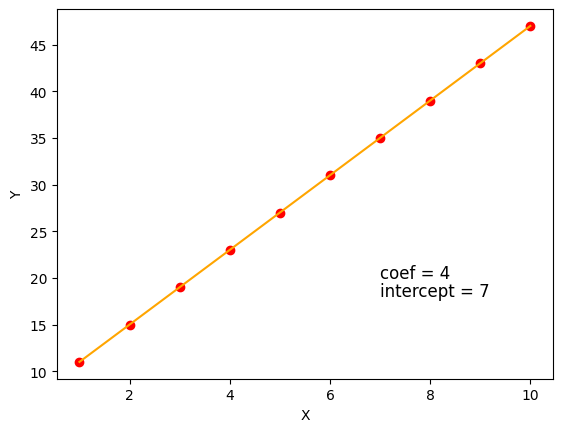

In [9]:
# scatter plot 그래프그리기
plt.scatter(x, y, color = 'r')

# 선 그래프 그리기
plt.plot(x, coef_intercept, color = 'orange')

# coef 값 그래프 내에 텍스트 삽입하기
plt.text(7, 20, "coef = %.0f"%reg.coef_[0], size = 12)

# intercept 값 그래프 내에 텍스트 삽입하기
plt.text(7, 18, "intercept = %.0f"%reg.intercept_, size = 12)


# x축(가로) label 설정하기
plt.xlabel("X")

# y축(세로) label 설정하기
plt.ylabel("Y")

# 화면에 출력
plt.show()

### 3) 사례기반 선형회귀 모델링

* 국민 건강검진 정보 데이터를 적용하여 키, 몸무게 등 다양한 데이터 중에 추론을 통해 예측했을 때 유의미한 결과를 가져올 만한 변수를 찾아본다.
*  콜레스테롤 중 LDL 콜레스테롤은 건강에 좋지 않은 수치이므로 건강검진에서 필요할 확률이 매우 높음
* 건강검진 데이터를 바탕으로 LDL콜레스테롤의 수치를 예측해 보는 선형회귀 모델 만들어 보기

## (1) 데이터 전처리하기

In [10]:
# 판다스 라이브러리 불러오기

import pandas as pd

In [11]:
# 데이터프레임 df 생성
# 국민건강보험공단_건강검진정보_20211229.CSV파일(encoding='cp949')
df = pd.read_csv('./국민건강보험공단_건강검진정보_2023.CSV', encoding = 'CP949')
df

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),...,혈청지피티(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치 유무,치아마모증유무,제3대구치(사랑니) 이상,치석
0,2023,34735,46,2,9,155,70,92.0,1.2,1.2,...,24.0,50.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN
1,2023,4105118,11,1,17,160,55,86.0,0.9,9.9,...,11.0,31.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN
2,2023,362482,36,2,13,150,65,96.0,1.0,0.8,...,29.0,24.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN
3,2023,653166,11,1,13,160,70,85.0,1.0,1.2,...,21.0,27.0,3.0,1.0,1,0.0,NaN,NaN,NaN,0.0
4,2023,4152237,41,1,12,165,65,84.5,1.0,1.2,...,33.0,49.0,3.0,1.0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2023,3265034,26,1,8,170,65,78.0,1.2,1.0,...,13.0,22.0,1.0,1.0,1,0.0,NaN,NaN,NaN,1.0
999996,2023,1421865,41,1,10,165,80,96.1,0.9,1.2,...,65.0,160.0,2.0,1.0,0,NaN,NaN,NaN,NaN,NaN
999997,2023,3889375,41,2,11,155,65,87.0,0.5,0.7,...,26.0,25.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN
999998,2023,2618086,41,2,7,160,55,69.0,1.0,1.2,...,20.0,16.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN


In [12]:
# pandas display 옵션 조정을 통해 View 범위 확장하기
# display 옵션을 통한 전체 열 확장

pd.options.display.max_columns = None

In [13]:

# 데이터 확인하기 (상위 5개)


df.head()


,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치 유무,치아마모증유무,제3대구치(사랑니) 이상,치석
0,2023,34735,46,2,9,155,70,92.0,1.2,1.2,1.0,1.0,139.0,89.0,98.0,168.0,181.0,46.0,86.0,13.8,1.0,0.5,26.0,24.0,50.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN
1,2023,4105118,11,1,17,160,55,86.0,0.9,9.9,1.0,2.0,123.0,52.0,87.0,NaN,NaN,NaN,NaN,15.5,1.0,1.3,22.0,11.0,31.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN
2,2023,362482,36,2,13,150,65,96.0,1.0,0.8,1.0,1.0,109.0,69.0,114.0,220.0,307.0,52.0,107.0,13.5,1.0,1.1,22.0,29.0,24.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN
3,2023,653166,11,1,13,160,70,85.0,1.0,1.2,1.0,1.0,116.0,64.0,98.0,91.0,171.0,45.0,11.0,15.6,1.0,0.9,22.0,21.0,27.0,3.0,1.0,1,0.0,NaN,NaN,NaN,0.0
4,2023,4152237,41,1,12,165,65,84.5,1.0,1.2,1.0,1.0,137.0,86.0,105.0,NaN,NaN,NaN,NaN,14.9,1.0,0.8,23.0,33.0,49.0,3.0,1.0,0,NaN,NaN,NaN,NaN,NaN


In [14]:
# 시력, 청력, 치아 관련 칼럼은 관계없다는 가정으로 열 제거하기
#["치아우식증유무", '치석','시력(좌)', '시력(우)', '청력(좌)',  '청력(우)', '구강검진 수검여부']

df.drop(df[['치아우식증유무','치석','시력(좌)','시력(우)','청력(좌)','청력(우)','구강검진수검여부']],axis = 1, inplace = True)
df

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피,흡연상태,음주여부,결손치 유무,치아마모증유무,제3대구치(사랑니) 이상
0,2023,34735,46,2,9,155,70,92.0,139.0,89.0,98.0,168.0,181.0,46.0,86.0,13.8,1.0,0.5,26.0,24.0,50.0,1.0,1.0,NaN,NaN,NaN
1,2023,4105118,11,1,17,160,55,86.0,123.0,52.0,87.0,NaN,NaN,NaN,NaN,15.5,1.0,1.3,22.0,11.0,31.0,1.0,1.0,NaN,NaN,NaN
2,2023,362482,36,2,13,150,65,96.0,109.0,69.0,114.0,220.0,307.0,52.0,107.0,13.5,1.0,1.1,22.0,29.0,24.0,1.0,1.0,NaN,NaN,NaN
3,2023,653166,11,1,13,160,70,85.0,116.0,64.0,98.0,91.0,171.0,45.0,11.0,15.6,1.0,0.9,22.0,21.0,27.0,3.0,1.0,NaN,NaN,NaN
4,2023,4152237,41,1,12,165,65,84.5,137.0,86.0,105.0,NaN,NaN,NaN,NaN,14.9,1.0,0.8,23.0,33.0,49.0,3.0,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2023,3265034,26,1,8,170,65,78.0,107.0,61.0,83.0,NaN,NaN,NaN,NaN,13.6,1.0,0.9,19.0,13.0,22.0,1.0,1.0,NaN,NaN,NaN
999996,2023,1421865,41,1,10,165,80,96.1,139.0,86.0,118.0,246.0,303.0,59.0,126.0,15.3,1.0,0.8,70.0,65.0,160.0,2.0,1.0,NaN,NaN,NaN
999997,2023,3889375,41,2,11,155,65,87.0,146.0,83.0,156.0,NaN,NaN,NaN,NaN,14.7,1.0,0.8,20.0,26.0,25.0,1.0,1.0,NaN,NaN,NaN
999998,2023,2618086,41,2,7,160,55,69.0,122.0,71.0,105.0,NaN,NaN,NaN,NaN,13.5,1.0,0.9,22.0,20.0,16.0,1.0,0.0,NaN,NaN,NaN


In [ ]:
# 기준년도 칼럼 확인하기 (모두 '2020' 동일 값이므로 '기준년도' 칼럼 삭제)



In [ ]:
# 가입자 일련번호 칼럼 확인하기 (모두 unique한 값으로 확인되어 '가입자 일련번호' 컬럼 삭제)
df

In [17]:
# 성별코드 칼럼 확인하기




In [18]:
# 불필요한 데이터 삭제하기["기준년도", '가입자 일련번호', '데이터 공개일자', '성별코드', '시도코드']




In [19]:
# 별도의 test 데이터 추출하기
# 'LDL 콜레스테롤' 열의 값이 NaN(결측값) 인 행(row)만 선별하여
# 새로운 DataFrame test에 저장하는 명령




In [20]:
# NaN 데이터 행 단위로 삭제하기
# df에서 결측값(NaN)이 포함된 모든 행(row)을 제거한 후,
# 그 결과를 train 변수에 저장


In [21]:
# 학습 데이터 확인하기




In [22]:
# 정답 데이터 생성하기
# 'LDL 콜레스테롤' 열만 선택하여 y 변수에 저장



In [23]:
# 학습 데이터 생성하기
# 머신러닝 학습을 위한 입력 데이터(x)를 준비하는 과정으로,
# train DataFrame에서 'LDL 콜레스테롤' 열을 제외한 나머지 열들만 추출해서 x에 저장




In [24]:
# validation set 추출을 위한 train_test_split 라이브러리 불러오기




In [25]:
# scikit learn 예시 코드 비율 대로 불러오기
# train_test_split() scikit-learn의 model_selection 모듈에 포함된 함수
###입력 파라미터
# x	입력 데이터
# y	목표 데이터
# test_size=0.33	전체 데이터 중 33%를 테스트용, 나머지 67%는 훈련용
# random_state=42	난수 시드 고정 → 항상 동일한 결과 보장 (재현 가능성 확보)
###반환값
# X_train	훈련용 입력 데이터
# X_test	테스트용 입력 데이터
# y_train	훈련용 정답 값
# y_test	테스트용 정답 값




In [26]:
# 학습/검증 데이터 확인하기
# 데이터 분할 결과 각각의 입력(X)과 출력(y) 데이터가 몇 개의 샘플과 특성을 가지고 있는지 확인



## (2) 선형회귀 학습 및 추론하기

In [27]:
#  LinearRegression 라이브러리 불러오기



# 모델 생성하기



# 학습하기




In [28]:
# 기울기와 절편 확인하기





In [29]:
# 각각 데이터에 대해 가중치(or 회귀계수) 확인하기
# 선형 회귀 모델을 학습한 후,
# 각 특성(feature)의 이름과 그에 대응하는
# 회귀 계수(coefficient) 를 보기 좋게 출력하는 데 사용




## (3) 예측을 통한 최종 검증하기

In [30]:
# 예측하기




In [31]:
# 결과 검증을 위해 MSE 라이브러리 불러오기


In [32]:
#  RMSE 계산하기




In [33]:
# 주요 Feature 삭제 전 rmse 확인하기




#### (4) 가중치의 의미 확인하기

In [34]:
# 주요 Feature 삭제를 위해 칼럼명 재확인하기



In [35]:
# 주요 Feature 삭제하기['총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤']




In [36]:
# scikit learn 예시 코드 비율 대로 불러오기




## (5) 선형회귀 모델 재학습하기

In [37]:
# 선형회귀 재생성 및 학습하기




In [38]:
# 각각 데이터에 대해 가중치(or 회귀계수) 확인하기




## (6) 가중치 비교하기

In [39]:
# 검증 데이터로 예측하기




In [40]:
# 각각 데이터에 대해 가중치(또는 회귀계수) 확인하기




In [41]:
# 주요 Feature 삭제 후 RMSE 확인하기



